In [233]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv

#read file 1
df = pd.read_csv('202105_fixed_laua_coverage_r01.csv', header=0)
df.head(10)
df.shape

(374, 40)

In [234]:
#Checking null value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 40 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   laua                                                          374 non-null    object 
 1   laua_name                                                     374 non-null    object 
 2   All Premises                                                  374 non-null    int64  
 3   All Matched Premises                                          374 non-null    int64  
 4   SFBB availability (% premises)                                374 non-null    float64
 5   UFBB (100Mbit/s) availability (% premises)                    374 non-null    float64
 6   UFBB availability (% premises)                                374 non-null    float64
 7   Full Fibre availability (% premises)                          374 non-n

In [235]:
#select specific columns I need: Name of area, number of house based on download speed
subdf = df[['laua_name',
            'Number of premises with 0<2Mbit/s download speed',
            'Number of premises with 2<5Mbit/s download speed',
            'Number of premises with 5<10Mbit/s download speed',
            'Number of premises with 10<30Mbit/s download speed',
            'Number of premises with 30<300Mbit/s download speed',
            'Number of premises with >=300Mbit/s download speed'
            ]]
#Change 'laua_name' to 'Name', speed - simplify for join
subdf1 = subdf.rename({'laua_name':'Name','Number of premises with 0<2Mbit/s download speed':'1(0<2)',
                       'Number of premises with 2<5Mbit/s download speed':'2(2<5)',
                       'Number of premises with 5<10Mbit/s download speed': '3(5<10)',
                       'Number of premises with 10<30Mbit/s download speed': '4(10<30)',
                       'Number of premises with 30<300Mbit/s download speed': '5(30<300)',
                       'Number of premises with >=300Mbit/s download speed': '6(300<=)'}, axis='columns')
subdf1.head()

,Name,1(0<2),2(2<5),3(5<10),4(10<30),5(30<300),6(300<=)
0,ABERDEEN CITY,65,145,509,5393,49125,70870
1,ABERDEENSHIRE,3241,3966,4395,8644,90353,14694
2,ADUR,3,11,32,274,3958,25517
3,ALLERDALE,601,502,513,1940,46341,1658
4,AMBER VALLEY,61,134,258,2151,41690,16806


In [236]:
#read file 2
df2 = pd.read_excel('2001-la-class-dataset-post0409-boundaries.xlsx', header=0)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326 entries, 0 to 325
Data columns (total 21 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Name                                                               326 non-null    object 
 1   Region                                                             326 non-null    object 
 2   District Code                                                      326 non-null    object 
 3   ONS code                                                           326 non-null    object 
 4   Total Population1                                                  326 non-null    int64  
 5   Major Urban Population                                             326 non-null    int64  
 6   Large Urban Population                                             326 non-null    int64  
 7   Other Urban Population    

In [237]:
df2.head()
#Capitalize Name value for join
df2['Name']=df2['Name'].str.upper()

In [238]:
#select specific columns I need: Name, total population, Classification, Numeric classification
subdf2 = df2[['Name', 'Total Population1', 'Classification','Numerical classification']]

In [239]:
df2.head()
df2.shape

(326, 21)

In [240]:
#join subdf1 and subdf2 (inner join)
innerjoindf = pd.merge(subdf1,
                  subdf2,
                  on ='Name',
                  how ='inner')
innerjoindf.shape

(296, 10)

In [241]:
outerjoindf = pd.merge(subdf1,
                  subdf2,
                  on ='Name',
                  how ='outer')
outerjoindf.shape

(404, 10)

In [245]:
innerjoindf.head()

,Name,1(0<2),2(2<5),3(5<10),4(10<30),5(30<300),6(300<=),Total Population1,Classification,Numerical classification
0,ADUR,3,11,32,274,3958,25517,59571,LU,2
1,ALLERDALE,601,502,513,1940,46341,1658,93577,R80,6
2,AMBER VALLEY,61,134,258,2151,41690,16806,116484,SR,4
3,ARUN,70,55,144,2179,68077,8430,140841,LU,2
4,ASHFIELD,9,214,74,679,6776,51396,111295,OU,3


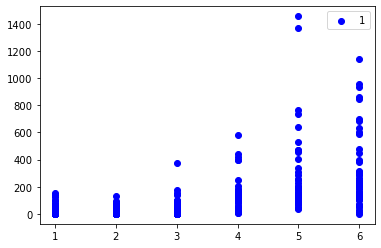

In [265]:
#show, but need to adjust or need much better codes!!!
plt.scatter(innerjoindf['Numerical classification'],innerjoindf['1(0<2)'],color='blue', marker= 'o', label='1')
# plt.scatter(innerjoindf['Numerical classification'],innerjoindf['2(2<5)'] , marker='v', label='2')
# plt.scatter(innerjoindf['Numerical classification'],innerjoindf['3(5<10)'],marker='.', label='3')
plt.legend()